In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
salary = pd.read_csv(r"Q:\Users\adria\PycharmProjects\Salary-Projection-Model\data\Salary Data.csv")
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [47]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [48]:
salary.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


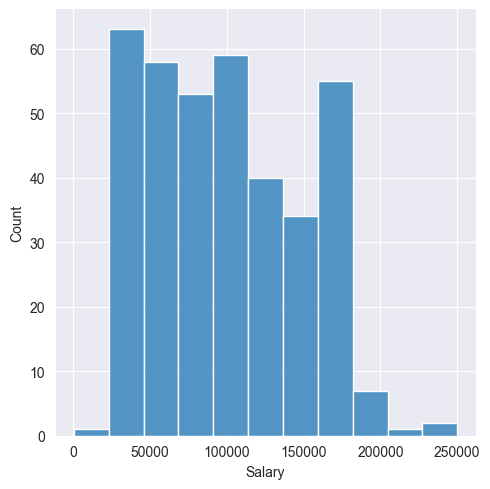

In [49]:
sns.displot(salary['Salary'])

In [50]:
salary.dropna(inplace=True)
salary.drop_duplicates(inplace=True)

In [51]:
#Preparing independent variable x by assigning the 'Salary' Column as the dependent variable y
x = salary.drop(['Salary'], axis=1)
y = salary['Salary']

In [52]:
#Convert categorical variables to numeric after using one-hot-encoding
x = pd.get_dummies(x, columns = ['Gender', 'Education Level', 'Job Title'])

In [53]:
# Divides dataset into training and testing sets, with 80% of data used for training , and 20% for testing performance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [55]:
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [56]:
trained_feature_names = x_train.columns.tolist()
print(trained_feature_names)

['Age', 'Years of Experience', 'Gender_Female', 'Gender_Male', "Education Level_Bachelor's", "Education Level_Master's", 'Education Level_PhD', 'Job Title_Account Manager', 'Job Title_Accountant', 'Job Title_Administrative Assistant', 'Job Title_Business Analyst', 'Job Title_Business Development Manager', 'Job Title_Business Intelligence Analyst', 'Job Title_CEO', 'Job Title_Chief Data Officer', 'Job Title_Chief Technology Officer', 'Job Title_Content Marketing Manager', 'Job Title_Copywriter', 'Job Title_Creative Director', 'Job Title_Customer Service Manager', 'Job Title_Customer Service Rep', 'Job Title_Customer Service Representative', 'Job Title_Customer Success Manager', 'Job Title_Customer Success Rep', 'Job Title_Data Analyst', 'Job Title_Data Entry Clerk', 'Job Title_Data Scientist', 'Job Title_Digital Content Producer', 'Job Title_Digital Marketing Manager', 'Job Title_Director', 'Job Title_Director of Business Development', 'Job Title_Director of Engineering', 'Job Title_Dir

In [57]:
input_age = float(input("Enter your age: "))
input_gender = input("Enter your Gender: ")
input_education_level = input("Enter your Education: ")
input_job_title = input("Enter your Job Title: ")
input_years_of_experience = float(input("Enter your Experience Level in years: "))

In [58]:
# Ensure input_data has all columns with 0 values except for those being set
input_data = pd.DataFrame(columns=trained_feature_names)
for column in input_data.columns:
    input_data.at[0, column] = 0

# Set input values
input_data['Age'] = input_age
input_data['Years of Experience'] = input_years_of_experience
input_data[f'Gender_{input_gender}'] = 1
input_data[f"Education Level_{input_education_level}"] = 1
input_data[f'Job Title_{input_job_title}'] = 1

# Predict the salary
predicted_salary = LR.predict(input_data)[0]
print(f"The estimated annual salary based on the provided information is: ${predicted_salary:,.2f}")


The estimated annual salary based on the provided information is: $75,290.00
